# Part-A :Domain: Entertainment

## Importing and Understanding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
f = np.load("images.npy", allow_pickle =True)

In [3]:
f.shape

(409, 2)

In [4]:
type(f)

numpy.ndarray

In [5]:
df = pd.DataFrame(f , columns= ['X','y'])

In [6]:
df.head(1)

,X,y
0,"[[[42, 37, 34], [56, 51, 48], [71, 66, 63], [7...","[{'label': ['Face'], 'notes': '', 'points': [{..."


In [7]:
image = []
index = []
for i in range(df.X.shape[0]):
    src = df.X[i]
    images = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
    images = cv2.resize(src,(224,224))
    image.append(images)
    index.append(i)

In [8]:
df['X'] = image

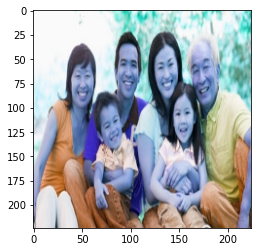

In [9]:
plt.imshow(df['X'][4])
plt.show()

In [10]:
image = np.array(image)

In [11]:
image.shape

(409, 224, 224, 3)

In [12]:
X = image

In [13]:
X.shape

(409, 224, 224, 3)

In [14]:
datas = []
for c in range(df['y'].shape[0]):
    data = []
    for i in range(len(df['y'][c])):
        x = []
        y = []
        for j in range(len(df['y'][c][i]['points'])):
            for k, value in df['y'][c][i]['points'][j].items():
                a = df['y'][c][i]['points'][j]['x']
                b = df['y'][c][i]['points'][j]['y']
            x.append(a)
            y.append(b)
        z = [(x[0],y[0],x[1],y[1])]
        data.append([x[0],y[0],x[1],y[1]])
    data = np.array(data)
    datas.append(data)
datas = np.array(datas)
print(datas)

[array([[0.08615385, 0.30630631, 0.17230769, 0.45345345],
        [0.58307692, 0.29129129, 0.65846154, 0.46846847]])
 array([[0.70530878, 0.23260437, 0.76923077, 0.36182903]])
 array([[0.46956522, 0.05      , 0.60652174, 0.33333333],
        [0.62826087, 0.00833333, 0.74565217, 0.30833333]])
 array([[0.495     , 0.27147766, 0.595     , 0.4604811 ]])
 array([[0.55862069, 0.1993865 , 0.66034483, 0.37730061],
        [0.3862069 , 0.18711656, 0.48965517, 0.40490798],
        [0.17241379, 0.23006135, 0.27758621, 0.44171779],
        [0.71551724, 0.1993865 , 0.84482759, 0.41411043],
        [0.29827586, 0.44171779, 0.41896552, 0.65337423],
        [0.6362069 , 0.42331288, 0.7362069 , 0.61042945]])
 array([[0.486, 0.046, 0.678, 0.272],
        [0.374, 0.524, 0.542, 0.794]])
 array([[0.0977918 , 0.06162465, 0.31230284, 0.42296919],
        [0.3044164 , 0.03361345, 0.46687697, 0.40616246],
        [0.41640379, 0.48179272, 0.55993691, 0.78711485],
        [0.51577287, 0.21288515, 0.68454259, 0.5

C:\Users\arunv\AppData\Local\Temp/ipykernel_16840/1034013547.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  datas = np.array(datas)


In [15]:
df['y'] = pd.DataFrame(datas)

In [16]:
cv2.destroyAllWindows()
color = (255,255,255)
thickness = -1
train = []
for i in range(df.X.shape[0]):
    images = df['X'][i].copy()
    for j in range(len(df['y'][i])):
        [x0,y0,x1,y1] = df['y'][i][j]
#         print(x0,y0,x1,y1)
        start_point = (int(x0*224), int(y0*224))
        end_point = (int(x1*224), int(y1*224))
#         print(start_point)
#         print(end_point)
        image = cv2.rectangle(images, start_point, end_point, color, thickness)
#     images = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#         images = cv2.resize(images,(224,224))
    train.append(images)



In [17]:
type(train)

list

In [18]:
image = []
for i in range(len(train)):
    src = train[i]
    images = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
    images = cv2.resize(images,(224,224))
    image.append(images)
    index.append(i)

In [19]:
df['masked'] = image

In [20]:
image = np.array(image)

In [21]:
image.shape

(409, 224, 224, 3)

In [22]:
y = image

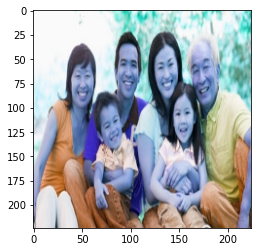

In [23]:
plt.imshow(df['X'][4])
plt.show()

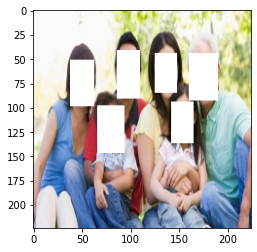

In [24]:
plt.imshow(df['masked'][4])
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test ,y_train,y_test= train_test_split(X,y, test_size = 0.03, random_state=1)

In [27]:
X_train

array([[[[ 31,  37,  74],
         [ 27,  34,  73],
         [ 19,  30,  70],
         ...,
         [  2,   2,  32],
         [  2,   1,  27],
         [  2,   0,  24]],

        [[ 35,  41,  78],
         [ 40,  48,  86],
         [ 29,  40,  81],
         ...,
         [  2,   2,  31],
         [  2,   1,  27],
         [  2,   0,  24]],

        [[ 21,  28,  66],
         [ 31,  39,  78],
         [ 24,  35,  77],
         ...,
         [  1,   1,  30],
         [  2,   1,  27],
         [  3,   0,  25]],

        ...,

        [[  6,   4,   4],
         [  4,   4,   4],
         [  0,   5,   4],
         ...,
         [ 35,  81,  92],
         [ 72, 107, 120],
         [ 25,  49,  64]],

        [[  6,   4,   4],
         [  4,   4,   4],
         [  0,   5,   4],
         ...,
         [ 35,  84,  94],
         [ 70, 104, 117],
         [ 29,  51,  66]],

        [[  8,   3,   4],
         [  4,   4,   4],
         [  0,   5,   4],
         ...,
         [ 57, 107, 117],
        

In [28]:
X_train.shape

(396, 224, 224, 3)

In [29]:
X_train = X_train/255
y_train = y_train/255
X_test = X_test/255
y_test = y_test/255

In [30]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (396, 224, 224, 3)
Shape of y_train: (396, 224, 224, 3)
Shape of X_test: (13, 224, 224, 3)
Shape of y_test: (13, 224, 224, 3)


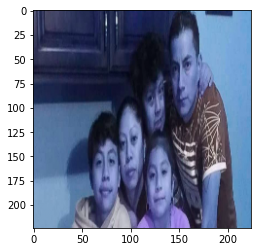

In [31]:
plt.imshow(X_train[1])

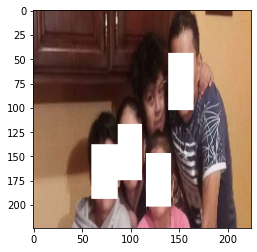

In [32]:
plt.imshow(X=y_train[1])

## Model_building

In [33]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, Conv2D, Reshape, UpSampling2D, MaxPooling2D,Input
from tensorflow.keras.models import Model

In [41]:
ALPHA = 1

def create_model(trainable=True):
    model = MobileNet(input_shape=(224, 224, 3), include_top=False, alpha=ALPHA, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
    
    block0 = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(3, kernel_size=1, activation="sigmoid")(x)
#    x = Reshape((224, 224))(x)

    return Model(inputs=model.input, outputs=x)

In [42]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

In [43]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

In [44]:
model = create_model(False)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                           

 on)                                                                                              
                                                                                                  
 conv_dw_5_relu (ReLU)          (None, 28, 28, 256)  0           ['conv_dw_5_bn[0][0]']           
                                                                                                  
 conv_pw_5 (Conv2D)             (None, 28, 28, 256)  65536       ['conv_dw_5_relu[0][0]']         
                                                                                                  
 conv_pw_5_bn (BatchNormalizati  (None, 28, 28, 256)  1024       ['conv_pw_5[0][0]']              
 on)                                                                                              
                                                                                                  
 conv_pw_5_relu (ReLU)          (None, 28, 28, 256)  0           ['conv_pw_5_bn[0][0]']           
          

 conv_dw_11 (DepthwiseConv2D)   (None, 14, 14, 512)  4608        ['conv_pw_10_relu[0][0]']        
                                                                                                  
 conv_dw_11_bn (BatchNormalizat  (None, 14, 14, 512)  2048       ['conv_dw_11[0][0]']             
 ion)                                                                                             
                                                                                                  
 conv_dw_11_relu (ReLU)         (None, 14, 14, 512)  0           ['conv_dw_11_bn[0][0]']          
                                                                                                  
 conv_pw_11 (Conv2D)            (None, 14, 14, 512)  262144      ['conv_dw_11_relu[0][0]']        
                                                                                                  
 conv_pw_11_bn (BatchNormalizat  (None, 14, 14, 512)  2048       ['conv_pw_11[0][0]']             
 ion)     

In [45]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)

stop = EarlyStopping(monitor="val_loss", patience=5)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1)

In [47]:
import tensorflow
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=20, batch_size=10, verbose=1)

Epoch 1/20
40/40 [==============================] - 103s 2s/step - loss: 1.6486 - dice_coefficient: 0.5070 - val_loss: 1.4200 - val_dice_coefficient: 0.5973
Epoch 2/20


KeyboardInterrupt: 

In [48]:
# preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_test, verbose=1)

1/1 [==============================] - 3s 3s/step


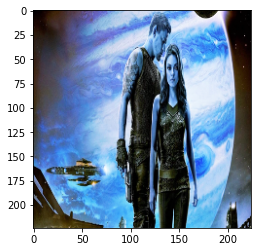

In [53]:
plt.imshow(X_test[1])

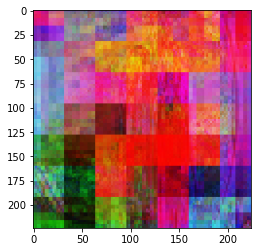

In [54]:
plt.imshow(preds_val[1])

## PART- B

In [55]:
#1.
from zipfile import ZipFile
import cv2
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd

In [56]:
images = 'training_images.zip'

In [57]:
with ZipFile(images,'r') as zip:
    zip.extractall()

In [58]:
path = './training_images/*.jpg'

In [59]:
files = glob(path)

In [60]:
len(files)

1091

In [61]:
files[1]

'./training_images\\real_00002.jpg'

In [63]:
img = cv2.imread(files[2])
img.shape

(600, 600, 3)

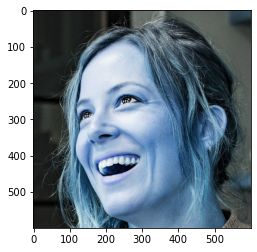

In [64]:
plt.imshow(img)

In [65]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(600, 600)

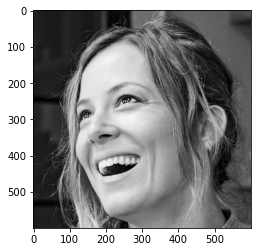

In [66]:
plt.imshow(gray, cmap='gray')

In [67]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)

[[ 34 116 369 369]]


In [68]:
(x,y,w,h) = faces[0]
x,y,w,h

(34, 116, 369, 369)

In [69]:
#2:
names = []
for img in files:
    names.append(img.split('\\')[-1])   

In [70]:
names

['real_00001.jpg',
 'real_00002.jpg',
 'real_00003.jpg',
 'real_00004.jpg',
 'real_00005.jpg',
 'real_00006.jpg',
 'real_00007.jpg',
 'real_00008.jpg',
 'real_00009.jpg',
 'real_00010.jpg',
 'real_00011.jpg',
 'real_00012.jpg',
 'real_00013.jpg',
 'real_00014.jpg',
 'real_00015.jpg',
 'real_00016.jpg',
 'real_00017.jpg',
 'real_00018.jpg',
 'real_00019.jpg',
 'real_00020.jpg',
 'real_00021.jpg',
 'real_00022.jpg',
 'real_00023.jpg',
 'real_00024.jpg',
 'real_00025.jpg',
 'real_00026.jpg',
 'real_00027.jpg',
 'real_00028.jpg',
 'real_00029.jpg',
 'real_00030.jpg',
 'real_00031.jpg',
 'real_00032.jpg',
 'real_00033.jpg',
 'real_00034.jpg',
 'real_00035.jpg',
 'real_00036.jpg',
 'real_00037.jpg',
 'real_00038.jpg',
 'real_00039.jpg',
 'real_00040.jpg',
 'real_00041.jpg',
 'real_00042.jpg',
 'real_00043.jpg',
 'real_00044.jpg',
 'real_00045.jpg',
 'real_00046.jpg',
 'real_00047.jpg',
 'real_00048.jpg',
 'real_00049.jpg',
 'real_00050.jpg',
 'real_00051.jpg',
 'real_00052.jpg',
 'real_00053

In [71]:
a = []
b = []
c = []
d = []
no_of_faces = []
for i in range(len(files)):
    img = cv2.imread(files[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if faces == ():

        a.append(0)
        b.append(0)
        c.append(0)
        d.append(0)
        no_of_faces.append(0)
    else:
        (x,y,w,h) = faces[0]

        a.append(x)
        b.append(y)
        c.append(w)
        d.append(h)
        no_of_faces.append(1)

C:\Users\arunv\AppData\Local\Temp/ipykernel_16840/456279633.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if faces == ():


In [72]:
len(a)

1091

In [73]:
df = pd.DataFrame(data = a ,columns =['x'])

In [74]:
#3:
df['y'] = b
df['w'] = c
df['h'] = d
df['Total_faces'] = no_of_faces
df['Image_name'] = names

In [75]:
df.head(5)

,x,y,w,h,Total_faces,Image_name
0,134,125,430,430,1,real_00001.jpg
1,79,143,430,430,1,real_00002.jpg
2,34,116,369,369,1,real_00003.jpg
3,122,157,380,380,1,real_00004.jpg
4,0,0,0,0,0,real_00005.jpg


In [76]:
#4:
df.to_csv('Image_data.csv',index=True)

## PART- C:

### Q1 - Extract and load 'PINS'

In [77]:
from zipfile import ZipFile
import cv2
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd

In [78]:
path = './PINS/'

### Q2 - Function to create metadata of the image

In [79]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    

### Q3 - Function to load metadata

In [80]:
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

In [81]:
metadata = load_metadata(path)

In [82]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    return img[...,::-1]

In [83]:
load_image(metadata[0].image_path())

array([[[233, 188, 165],
        [231, 186, 163],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[232, 187, 164],
        [233, 188, 165],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[230, 186, 161],
        [228, 184, 159],
        [206, 164, 140],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       ...,

       [[198, 118,  91],
        [197, 120,  94],
        [195, 119,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[200, 120,  93],
        [200, 120,  93],
        [198, 121,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[201, 121,  94],
        [201, 121,  94],
        [199, 122,  96],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]]

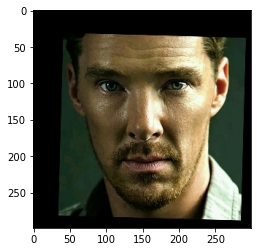

In [84]:
plt.imshow(load_image(metadata[1396].image_path()))

### Q4 - Generate embedding vectors

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [86]:
model = vgg_face()

model.load_weights('../New Folder/vgg_face_weights.h5')

In [87]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [88]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 [==============================] - 0s 321ms/step
(2622,)


- Write code to iterate through metadata and create embeddings for each image using vgg_face_descriptor.predict() and store in a list with name embeddings

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [89]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector

1/1 [==============================] - 0s 196ms/step


1/1 [==============================] - 0s 207ms/step


1/1 [==============================] - 0s 227ms/step


1/1 [==============================] - 0s 235ms/step


1/1 [==============================] - 0s 236ms/step


1/1 [==============================] - 0s 227ms/step


1/1 [==============================] - 0s 218ms/step


1/1 [==============================] - 0s 221ms/step


1/1 [==============================] - 0s 216ms/step


1/1 [==============================] - 0s 222ms/step


1/1 [==============================] - 0s 235ms/step


1/1 [==============================] - 0s 241ms/step


1/1 [==============================] - 0s 245ms/step


1/1 [==============================] - 0s 313ms/step


1/1 [==============================] - 0s 306ms/step


1/1 [==============================] - 0s 375ms/step


1/1 [==============================] - 0s 367ms/step


1/1 [==============================] - 0s 466ms/step


1/1 [==============================] - 1s 630ms/step


1/1 [==============================] - 0s 349ms/step


1/1 [==============================] - 0s 325ms/step


1/1 [==============================] - 0s 326ms/step


1/1 [==============================] - 0s 395ms/step


1/1 [==============================] - 0s 326ms/step


1/1 [==============================] - 0s 332ms/step


1/1 [==============================] - 0s 425ms/step


1/1 [==============================] - 0s 333ms/step


1/1 [==============================] - 0s 351ms/step


1/1 [==============================] - 0s 394ms/step


1/1 [==============================] - 1s 525ms/step


1/1 [==============================] - 0s 381ms/step


1/1 [==============================] - 1s 516ms/step


1/1 [==============================] - 1s 532ms/step


1/1 [==============================] - 1s 522ms/step


1/1 [==============================] - 0s 374ms/step


In [90]:
print('embeddings shape :', embeddings.shape)

embeddings shape : (10770, 2622)


### Q5

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [91]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

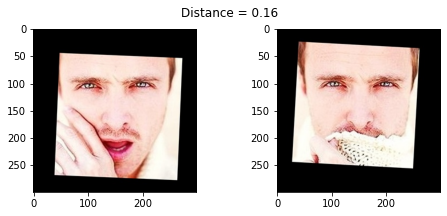

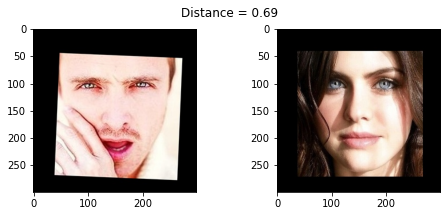

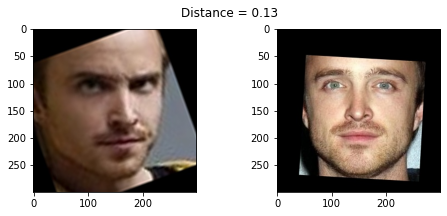

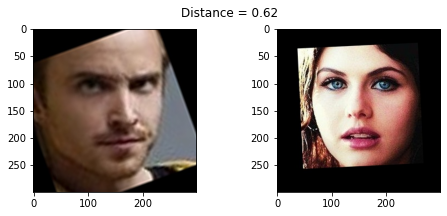

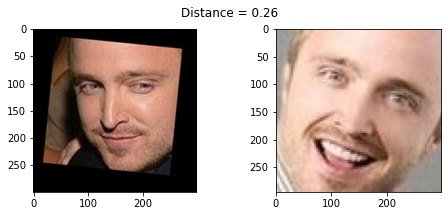

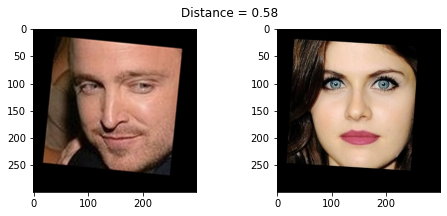

In [92]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30,31)
show_pair(30, 100)
show_pair(70,72)
show_pair(70,115)

### Q6

- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [93]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
y_train = targets[train_idx]
y_test = targets[test_idx]

- Encode the targets
- Use LabelEncoder

In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [95]:
print(le.classes_)
y_test_encoded = le.transform(y_test)

['pins_Aaron Paul' 'pins_Alvaro Morte' 'pins_Amanda Crew'
 'pins_Amaury Nolasco' 'pins_Anna Gunn' 'pins_Benedict Cumberbatch'
 'pins_Betsy Brandt' 'pins_Brenton Thwaites' 'pins_Brit Marling'
 'pins_Bryan Cranston' 'pins_Caity Lotz' 'pins_Cameron Monaghan'
 'pins_Chance Perdomo' 'pins_Chris Evans' 'pins_Chris Pratt'
 'pins_Cobie Smulders' 'pins_Danielle Panabaker' 'pins_Dave Franco'
 'pins_Dominic Purcell' 'pins_Dwayne Johnson' 'pins_Emilia Clarke'
 'pins_Emily Bett Rickards' 'pins_Emma Stone' 'pins_Gwyneth Paltrow'
 'pins_Henry Cavil' 'pins_Jason Momoa' 'pins_Jeremy Renner'
 'pins_Jesse Eisenberg' 'pins_Jim Parsons' 'pins_Jon Bernthal'
 'pins_Josh Radnor' 'pins_Kit Harington' 'pins_Krysten Ritter'
 'pins_Kumail Nanjiani' 'pins_Maisie Williams' 'pins_Mark Ruffalo'
 'pins_Martin Starr' 'pins_Melissa benoit' 'pins_Mike Colter'
 'pins_Morena Baccarin' 'pins_Morgan Freeman' 'pins_Natalie Portman'
 'pins_Neil Patrick Harris' 'pins_Paul Rudd' 'pins_Pedro Alonso'
 'pins_Peter Dinklage' 'pins_R

- Scale the features using StandardScaler

In [96]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [97]:
X_test_std = scaler.transform(X_test)

- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

### Q7

 - Train the SVM classifier and print the score

In [99]:
from sklearn.svm import SVC

clf = SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train_encoded)

SVC(C=5.0, gamma=0.001)

In [100]:
y_predict = clf.predict(X_test_pca)

In [101]:
print('y_predict : ',y_predict)
print('y_test_encoded : ',y_test_encoded)

y_predict :  [ 0  0  0 ... 99 99 99]
y_test_encoded :  [ 0  0  0 ... 99 99 99]


In [102]:
y_predict_encoded = le.inverse_transform(y_predict)

In [103]:
print('y_predict_encoded : ',y_predict_encoded)

y_predict_encoded :  ['pins_Aaron Paul' 'pins_Aaron Paul' 'pins_Aaron Paul' ... 'pins_zendaya'
 'pins_zendaya' 'pins_zendaya']


### Q8 - Import and display test images

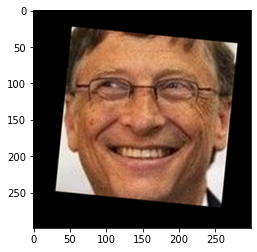

In [104]:
example_idx = 170
example_image = load_image(metadata[test_idx][example_idx].image_path())
plt.imshow(example_image)


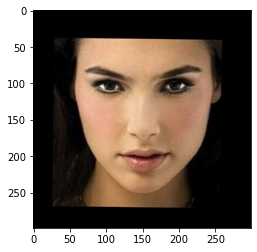

In [108]:
example_idx = 500
example_image = load_image(metadata[test_idx][example_idx].image_path())
plt.imshow(example_image)

### Q9 - Use the trained SVM model to predict the face on both test images

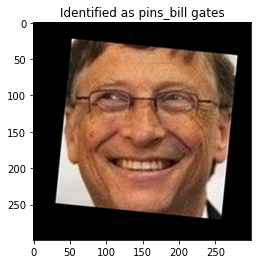

In [106]:
example_idx = 170

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

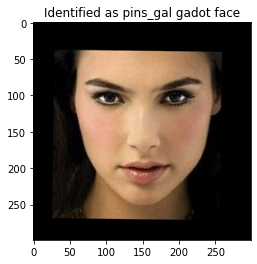

In [107]:
example_idx = 500
example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');